# Assignment 2

> * **Daniel Holmelund - s194245**
> * **Christian Djurhuus - s194244** 
> * **Felix Burmester - s194266**

#### **Link to github:** https://github.com/DanielHolmelund/Computational-Social-Science-02467

#### **Contributions:** 
*All members of the group participated equally throughout the exercise sessions and in preparation of this assignment.*

## Part 1: TF-IDF
In the following exercise, we start with the r/wallstreetbets submissions data provided in the course, and the list of the 15 stocks that was identified in the weekly exercises.

In [3]:
#imports
import pandas as pd
import numpy as np
import nltk
import re
import os
from tqdm import tqdm, tqdm_pandas
#tqdm_pandas(tqdm())
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


#load data and dict
submissions = pd.read_csv(f"Week_6{os.sep}wallstreet_subs.csv", sep=',')

In [2]:
submissions.head()

,created_utc,title,selftext,score
0,1586173811,What is the Fed actually buying?,"Okay, I may actually just be retarded. On my d...",1
1,1586173320,I didn’t learn about puts because I was lazy,"Beginning of the this virus shit, everyone was...",1
2,1586173268,HOT TAKE,Literally everyone has free time on their hand...,1
3,1586172639,Fuck you Gordon,"Gordon I believed in you, I can't even begin t...",1
4,1586171822,Can’t find a picture,Someone uploaded a ohoto of the stock market h...,1


> * Tokenize the text of each submission. Create a column tokens in your dataframe containing the tokens.

In [9]:
#1
#Create preprocessing function and apply it to the data
submissions['text'] = submissions['title'] + ' ' + submissions['selftext']

#Importing two different normalization methods
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()

def preprocess(text):
    #Common english stop words
    stop_words = set(stopwords.words('english'))
    #Removing urls
    text = re.sub(r'http\S+', '', text)
    #Tokenize using nltk
    word_tokens = word_tokenize(text.lower())
    #removing none letter characters and stop words
    filtered_sentence = [w for w in word_tokens if w not in stop_words and w.isalpha()]
    #Conduct stemming
    processed_text = [porter.stem(t) for t in filtered_sentence]
    return processed_text
    
submissions['tokens'] = [preprocess(x) for x in tqdm(submissions['text'])]



100%|██████████| 82242/82242 [02:36<00:00, 526.54it/s] 


In [4]:
def get_ticker(word: str)->list:
    return re.findall(r'\$[a-zA-Z]{1,5}', word)
#Setting charachter length constraint due to the following: https://www.investopedia.com/terms/s/stocksymbol.asp
submissions['ticker'] = submissions["text"].map(get_ticker)

In [5]:
#Removing dollar sign
for i in tqdm(range(len(submissions))):
    ticker_list = submissions.iloc[i, :]['ticker']
    temp = []
    for j in ticker_list:
        temp.append(re.sub(r'\$', '', j).upper())
    submissions['ticker'][i] = temp

  0%|          | 0/82242 [00:00<?, ?it/s]<ipython-input-5-18e75187b0e5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submissions['ticker'][i] = temp
100%|██████████| 82242/82242 [04:42<00:00, 291.09it/s]


In [6]:
fdist2 = nltk.FreqDist((list([a for b in submissions.ticker.tolist() for a in b])))
fdist2.most_common(15)

[('SPY', 1150),
 ('TSLA', 988),
 ('SPCE', 562),
 ('PLTR', 394),
 ('MSFT', 377),
 ('ROPE', 359),
 ('AAPL', 243),
 ('AMZN', 230),
 ('NIO', 228),
 ('ZM', 227),
 ('AMD', 212),
 ('BABA', 207),
 ('GME', 202),
 ('DIS', 169),
 ('BA', 164)]

The 15 most frequent tickers yields that GME is in fact a part of the top 15 tickers as requested by the exercise description. Another noteworthy finding is that the regular expression pattern utilized in the above search does find tickers associated with stocks, however, not all of them are stocks. For instance, the sixth most frequent term $ROPE, is not a stock but a common phrase in r/wallstreetbets, and is used when someone has lost a lot of money on some investment (https://www.urbandictionary.com/define.php?term=\%24ROPE). Thereby, illustrating that the used pattern may not be completely perfect.

> Find submissions discussing at least one of the top 15 stocks you identified above (follow the instructions in Week 6, Exercise 3).

In [7]:
submissions[submissions.ticker.astype(bool)]

,created_utc,title,selftext,score,text,tokens,ticker
5,1586171535,Jamie Dimon has joined the bull gang. CNBC: “J...,https://www.cnbc.com/2020/04/06/jamie-dimon-de...,1,Jamie Dimon has joined the bull gang. CNBC: “J...,"[jami, dimon, join, bull, gang, cnbc, jami, di...","[BAC, JPM]"
24,1586153964,Don’t sell your OTM puts tomorrow morning,I hope this doesn’t age well but tomorrow’s go...,1,Don’t sell your OTM puts tomorrow morning I ho...,"[sell, otm, put, tomorrow, morn, hope, age, we...",[ROPE]
28,1586151835,"If exponential patterns hold, we're looking at...",I modeled deaths as exponentially growing 8 da...,1,"If exponential patterns hold, we're looking at...","[exponenti, pattern, hold, look, death, model,...",[SPY]
32,1586151208,SPX: Likely to go higher this week- Don't be f...,&amp;#x200B;\n\n![img](50u8q2miv4r41)\n\nHenlo...,1,SPX: Likely to go higher this week- Don't be f...,"[spx, like, go, higher, fool, amp, img, henlo,...","[VIX, SPY, AAPL]"
35,1586150835,Buy $CMPR,Buy CMPR thank me later. $43.86 at post. Big n...,1,Buy $CMPR Buy CMPR thank me later. $43.86 at p...,"[buy, cmpr, buy, cmpr, thank, later, post, big...",[CMPR]
...,...,...,...,...,...,...,...
82173,1603294919,$AMD calls after $INTC earnings miss,"Hi, I'm an Autist reborn. After loosing a good...",1,"$AMD calls after $INTC earnings miss Hi, I'm a...","[amd, call, intc, earn, miss, hi, autist, rebo...","[AMD, INTC, SNAP, INTC, AMD]"
82192,1603910060,$ICLN $25 post election,Biden wins he’s making everything on earth cle...,1,$ICLN $25 post election Biden wins he’s making...,"[icln, post, elect, biden, win, make, everyth,...",[ICLN]
82193,1603910038,$BUD vs $TAP calls for ER play?,$SAM exploded on earnings last week. Which one...,1,$BUD vs $TAP calls for ER play? $SAM exploded ...,"[bud, vs, tap, call, er, play, sam, explod, ea...","[BUD, TAP, SAM]"
82210,1602095843,EVERYONE PLEASE BUY $WORK,IT ALMOST PASSED RESISTANCE PRICE TODAY AND I ...,1,EVERYONE PLEASE BUY $WORK IT ALMOST PASSED RES...,"[everyon, pleas, buy, work, almost, pass, resi...","[WORK, WORK]"


In [9]:
#2 
#Get the top 15 stocks.
top15 = [porter.stem(x[0]).lower() for x in fdist2.most_common(15)] 

#Find intersection between set of tokens and the top 15 stocks:
def inter_top_stock(tokens):
    return list(set(tokens) & set(top15))

submissions['stock'] = submissions['tokens'].apply(lambda x: inter_top_stock(x))

submissions[submissions.stock.astype(bool)]

#Exploding stock column
submissions = submissions.explode('stock')

#Fill all nan valued classes with "other"
submissions['stock'] = submissions['stock'].fillna('other')

Notice that we have chosen to conduct stemming on the top15 stocks to ensure that the stocks is in the same format as the preprocessed tokens. For instance, the stock SPY is altered to SPI by the porter stemmer, which would introduce issues when trying to determine the intersection if this precaution was not taken. The following code section will demonstrate the issue:

In [11]:
print(f'The porter stemmer alters spy to {porter.stem("spy")}.')

The porter stemmer alters spy to spi.


>Now, we want to find out which words are important for each stock, so we're going to create several large documents, one for each stock. Each document includes all the tokens related to the same stock. We will also have a document including discussions that do not relate to the top 15 stocks.

In [12]:
#3
#create corpora with important words for each class
corpora = {}
for i in top15 + ["other"]: #Also need to make document for other
    temp = submissions[submissions['stock']==i]
    corpora[i] = [item for sublist in temp['tokens'].tolist() for item in sublist]

In [13]:
corpora.keys()

dict_keys(['spi', 'tsla', 'spce', 'pltr', 'msft', 'rope', 'aapl', 'amzn', 'nio', 'zm', 'amd', 'baba', 'gme', 'di', 'ba', 'other'])

>Now, we're ready to calculate the TF for each word. Find the top 5 terms within $\textbf{5 stocks of your choice}$.

In the following section the five following stocks will be investigated in terms of their term-frequency with and without inverse document frequency weighting:
* \$MSFT (Microsoft)
* \$GME (GameStop)
* \$TSLA (Tesla)
* \$AAPL (Apple)
* \$AMSN (Amazon)

In [14]:
#4
#We could use sklearn countvectorizer but lets try to use nltk and impolement tf and tf-idf manually
#The 5 chosen are 'msft' 'gme' 'dis''aapl', 'amzn'
stock5 = ['msft','gme','tsla','aapl','amzn']
for i in stock5:
    fdist = nltk.FreqDist(corpora[i]) #Only gives raw counts, but we want normalized
    dict_fdist = dict(fdist)
    total_count = sum(dict_fdist.values())
    for k, v in dict_fdist.items():
        fdist[k] = v / total_count
    print(f'The 5 most frequent words associated with ${i.upper()} stock')
    print(fdist.most_common(10))
    print('\n')

The 5 most frequent words associated with $MSFT stock
[('spi', 0.015001847899489747), ('gt', 0.012594741129598706), ('earn', 0.01246896786589861), ('msft', 0.010979038434374413), ('stock', 0.009595532533673373), ('market', 0.008099798182286094), ('call', 0.008014659357627569), ('amp', 0.007759242883651991), ('go', 0.0064589408343217825), ('compani', 0.006159019974729249)]


The 5 most frequent words associated with $GME stock
[('gme', 0.01677669131880677), ('stock', 0.00940752138449066), ('gt', 0.009301632997468605), ('go', 0.008299002332853526), ('share', 0.007633890901871246), ('short', 0.007240118462632981), ('buy', 0.007173938220744197), ('amp', 0.006922453301566817), ('call', 0.006670968382389438), ('market', 0.00599592991512384)]


The 5 most frequent words associated with $TSLA stock
[('tsla', 0.015283208161045635), ('spi', 0.011099338769446502), ('stock', 0.009476214139936679), ('call', 0.007951018724274048), ('gt', 0.007816626505270988), ('go', 0.006951932383003239), ('amp', 0

The similarities between frequent words among the five stocks are very evident, for instance,  is 'stock', 'earn', 'buy' and 'market' present as part of the most frequent words in almost all five documents. Hence, utilizing the word frequency as a description of the content of a document may sometimes be inconvenient. For example, based on the above, the term-frequency does provide insight into what the overall theme of r/wallstreetbets is, namely earning money on stocks. And it is also more or less possible to see what specific stock the document adresses in all of the above examples. However, it does not successfully provide any useful understanding of how the five documents differ from each other. Hence, TF does provide some usefull description of the corpus but seems insufficient in terms of descriping the individual document. Thereby, demonstrating one of the common shortcomings of using term-frequency, which is that domain-specific common words, such as stock and earn, are given a greater emphasis than unique words, which entails that the domain-specific common words are attached with disproportional importance compared with their weak descriptive power of a document. TF-IDF is the extension of TF, which emphasized that unique words should be attached with greater importance, given that the TF is weighted with the inverse document frequency (IDF), which entails that domain-specific common words that have a high number of occurrences across documents are weighted with less importance.
IDF is calculated as follows:
$$ IDF(t) = log(\frac{Total\ number\ of\ documents}{Number\ of\ documents\ with\ term\ t})$$
and TF-IDF:
$$ TF\_IDF(t) = TF(t) \cdot IDF(t)$$
Consequently, according to TF-IDF, a term's importance is proportional with how frequent the word occur in a document, and weighted with the inverse of how frequent the term occur in the corpus. Thus, compensating for words that are more frequent in the corpus in general.


In [44]:
N = len(top15) + 1  #Plus one for the 'other' group
temp = []
#Taking all terms in our five documents
for i in stock5:
    temp.append(corpora[i])
terms = set([item for sublist in temp for item in sublist])

idf_dict = {}
for term in tqdm(terms):
    counter = 0
    for i in top15 + ["other"]:
        if term in set(corpora[i]):
            counter += 1
    idf_dict[term] = np.log((N)/(counter))

100%|█████████████████████████████████████████████████████████████████████████| 20570/20570 [1:46:08<00:00,  3.23it/s]


In [46]:
#Storing IDF_dict
import pickle
with open('idf_dict.p', 'wb') as fp:
    pickle.dump(idf_dict, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [50]:
#Loading IDF_dict
with open('idf_dict.p', 'rb') as fp:
    idf_dict = pickle.load(fp)

The choice of log base is arbitrary due to the fact that changing the base only would correspond to multiplying with a given factor, which is due to the following equality:
$$log_{b}(x) = \frac{log_{k}(x)}{log_{k}(b)}$$
Essentially this entails that all terms are multiplied with the same constant, and thereby resulting in no relative difference. Consequently, resulting in the arbitrary choice of base. The log base used in this assingment was therefore numpy's default log base which is the natural logarithm.

>We're ready to calculate TF-IDF. Do that for the $\textbf{5 stock of your choice}$.

In [45]:
#5
for i in stock5:
    print(f'###########\n## {i} ##\n##########')
    fdist = nltk.FreqDist(corpora[i])
    dict_fdist = dict(fdist)
    total_count = sum(dict_fdist.values())
    for k, v in dict_fdist.items():
        fdist[k] = v / total_count
    print(f'The 10 most frequent words associated with {i.upper()} stock:')
    print(fdist.most_common(10))
    fdist = dict(fdist)
    print(f'\nThe top 10 TF-idf words associated with {i.upper()} stock:')
    tf_idf_dict = {}
    for key in fdist:
        tf_idf_dict[key] = idf_dict[key] * fdist[key]
    print(sorted(tf_idf_dict.items(), key=lambda x: x[1], reverse=True)[:10])
    print('\n')

###########
## msft ##
##########
The 10 most frequent words associated with MSFT stock:
[('msft', 0.015174393569685661), ('call', 0.010386105927946032), ('earn', 0.00937562796038467), ('stock', 0.00865221759724415), ('gt', 0.008324960528204393), ('go', 0.0077623080235395435), ('market', 0.007710635854743792), ('spi', 0.007348930673173533), ('buy', 0.006843691689392852), ('amp', 0.006585330845414095)]

The top 10 TF-idf words associated with MSFT stock:
[('msft', 0.000979332920146982), ('spi', 0.00047428911758915513), ('macrohard', 0.00023877612076128444), ('tsla', 0.0001674833446486704), ('cvm', 0.00015359534161349598), ('jedi', 0.00014204482980251562), ('aapl', 0.0001337643526950664), ('amzn', 0.00010967935844249212), ('smead', 0.000107449254342578), ('amd', 0.00010597397471132684)]


###########
## gme ##
##########
The 10 most frequent words associated with GME stock:
[('gme', 0.022230074451532116), ('short', 0.010371141817460464), ('share', 0.009614848152349779), ('go', 0.00896393

Indeed the words associated with the highest TF-IDF value appears to be more descriptive of the stocks, which is reflected by a more diverse set of frequent terms describing the stocks. An example of this could be the word "powerfleet" which is seen in the TF-IDF of the Amazon stock. This word refers to the big fleet of shipping vehicles that Amazon has access to. This word is not seen in the frequent words, where words like 'stock' and 'market' take its spot. This is of course due to the weighting of the IDF which is extremely small when the word is quite common in all documents. Thereby, we end up with words that are more unique (not totally) to each document.

TF-IDF is to be prefered when you want to know something about one or more specific documents while TF is quite nice when you want to learn the most frequent words of a corpus (after removing stop words).

>Visualize the results in a Wordcloud and comment your results (follow the instrutions in Week 6, Exercise 4).

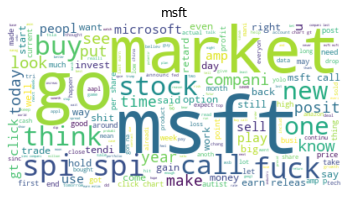

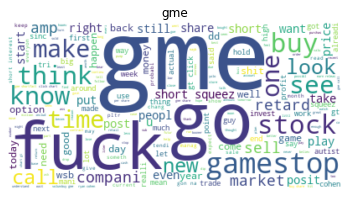

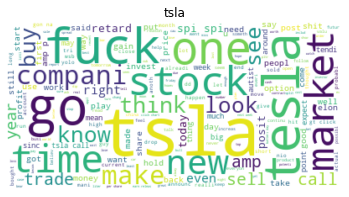

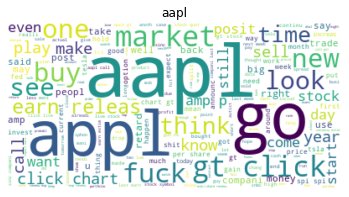

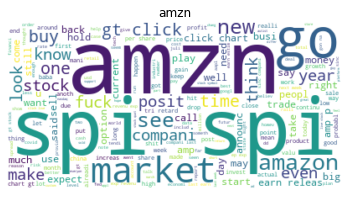

In [47]:
#6
#load modules
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Using word frequencies
for i in stock5:
    wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(corpora[i]))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(i)
    plt.show()

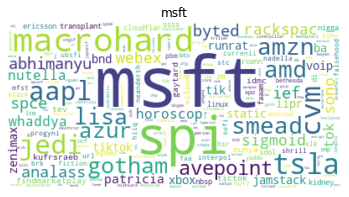

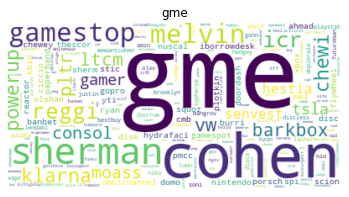

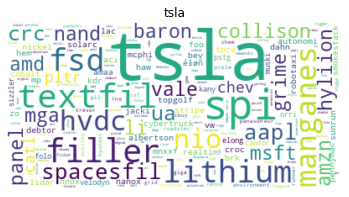

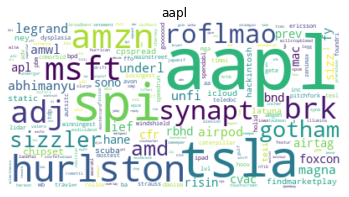

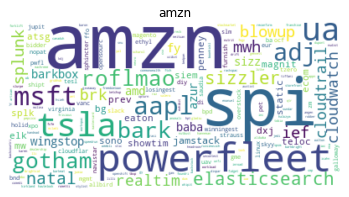

In [48]:
#Using word tf-idf weighting
for i in stock5:
    fdist = dict(nltk.FreqDist(corpora[i]))
    tf_idf_dict = {}
    for key in fdist:
        tf_idf_dict[key] = idf_dict[key] * fdist[key]
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(tf_idf_dict)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(i)
    plt.show()

The Wordclouds make it feasible to visually present the most informative words according to TF-IDF and TF, which can be beneficial in terms of gathering insights about the documents' content. More specifically, the word clouds of the TF-IDF results yield that many submissions and comments include mentions of other stocks such as SPY (replaced by spi in the stemming process) or DJIA. More interestingly, the tf-idf results also appear to be providing a more nuanced description of each of the documents, for instance, it seems people were quite sure that there would happen something to AAPL, MSFT and AMZN once Palantir (PLTR) released Gotham, a software system for the US government. Furthermore, another noteworthy finding depicted in the word cloud is that the names of influential individuals related to each document emerge e.g. Cohen in the GME cloud, who was the biggest shareholder of GameStop. Another example is the term Melvin present in the GME cloud, which is a hedge fund that experienced a tremendous loss due to its shorting of the GME stock. Thus, the TF-IDF Wordclouds are beneficial and provide valuable descriptions of the different documents investigated. 

## Part 2: Sentiment analysis

In [6]:
#import libraries
from datetime import datetime, timedelta
from collections import Counter

#get data
daily_happiness = pd.read_csv(f'Week_7{os.sep}daily_happiness_without_stop.csv').set_index("date")
daily_words = pd.read_csv(f'Week_7{os.sep}daily_words.csv').set_index("date")

#Convert the index to datetime format from string.
daily_happiness.index = pd.to_datetime(daily_happiness.index)
daily_words.index = pd.to_datetime(daily_words.index)

#Loading in hedonometer
labMT = pd.read_csv(f'Week_7{os.sep}Hedonometer.csv')


NOTICE: The function to calculate the happiness score is not present in this notebook, but can be found under week7, given that the assignment does not ask us to provide it. However, we do think that it is important to emphasise that we have chosen not to conduct stemming or any other sort of normalization of the texts, due to the following from the paper *Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter*:

**"we avoid stemming words, i.e., conflating inflected words with their root form, such as all conjugations of a specific verb. For verbs in particular, by focusing on the most frequent words, we obtained scores for those conjugations likely to appear in texts, obviating any need for stemming."**

Hence, we decided that it would be more appropriate to avoid normalization, as an attempt to have the words in the same inflectional form as in the provided hedonometer. Furthermore, stemming may also result in altering the sentiment of a word, for instance, demonstrated by the following example: 

In [10]:
print(f'Armed with associated happiness score {labMT.loc[labMT.Word == "armed", "Happiness Score"].values[0]} becomes -> {porter.stem("armed") } with associated happiness score of {labMT.loc[labMT.Word == "arm", "Happiness Score"].values[0]}')

Armed with associated happiness score 3.84 becomes -> arm with associated happiness score of 5.5


Hence, stemming and other forms of normalization in sentiment analysis may alter the estimated sentiment. In order to find the more proper sentiment scores, we did not remove any stop words as they might influence the scores as well. We figured that a sentiment score of a text should be computed on the entire text and not just parts of it.

>Pick a day of your choice in 2020. We call it $\textit{d}$. It is more interesting if you pick a day where you expect something relevant to occur (e.g. Christmas, New Year, Corona starting, the market crashes...).

In [11]:
#This is the day that the US declared a medical emergency due to Covid-19.
date_min_h = pd.to_datetime("2020-02-03")

d_min = date_min_h - timedelta(days = 7) # 7 days before as reference

In [12]:
date_min_h

Timestamp('2020-02-03 00:00:00')

> Build two lists containing all tokens for submissions posted on r/wallstreebets on day d, and in the 7 days preceding days. 

In [15]:
# lets define two lists
import ast
import itertools
l = ast.literal_eval(daily_words["document"].loc[date_min_h])
l_ref = np.concatenate(daily_words[(daily_words.index < date_min_h) & (daily_words.index > d_min)].values)
l_ref = list(itertools.chain.from_iterable([ast.literal_eval(x) for x in l_ref]))

> For each token , compute the relative frequency in the two lists.

In [16]:
from collections import Counter
# Counter(l) # counts how many time a word appears.
# Want to count the relative freq for both of hte lists.
p = dict([(item[0], item[1]/len(l)) for item in Counter(l).items()])
p_ref = dict([(item[0], item[1]/len(l_ref)) for item in Counter(l_ref).items()])

print(f"{dict(itertools.islice(p.items(), 5))}")
print(f"\n{dict(itertools.islice(p_ref.items(), 5))}")

{'yolo': 0.0008280430582390284, 'google': 0.000598031097617076, 'i': 0.017618916183641548, 'either': 0.0002760143527463428, 'be': 0.0061183181525439325}

{'market': 0.0037423783270656105, 'volatility': 0.0002738325605169959, 'in': 0.014148015626711453, 'the': 0.04181423199094527, 'virus': 0.0024005987805323305}


In [17]:
# Top 10 word used for the given day.
sorted(p.items(), key = lambda x: x[1], reverse = True)[:10]

[('the', 0.04025209310884166),
 ('to', 0.026681387432146472),
 ('and', 0.02152911951421474),
 ('a', 0.01973502622136351),
 ('i', 0.017618916183641548),
 ('of', 0.015824822890790322),
 ('is', 0.01568681571441715),
 ('in', 0.01384672002944153),
 ('for', 0.012420645873585427),
 ('you', 0.010948569325604932)]

In [18]:
# Top 10 word used for the reference days.
sorted(p_ref.items(), key = lambda x: x[1], reverse = True)[:10]

[('the', 0.04181423199094527),
 ('to', 0.025521194640184014),
 ('and', 0.02116725692796378),
 ('a', 0.02044616451860236),
 ('i', 0.019286940012413743),
 ('of', 0.017634816897294535),
 ('in', 0.014148015626711453),
 ('is', 0.013874183066194458),
 ('for', 0.012523275767643945),
 ('this', 0.010889408156559203)]

>For each token, compute the difference in relative frequency. Do you notice anything interesting?

In [19]:
all_tokens = set(p.keys()).union(set(p_ref.keys())) # Set of the tokens that exist in both p and p_ref.
# dp show the difference between the two lists.
dp = dict([(token, p.get(token, 0) - p_ref.get(token, 0)) for token in all_tokens])
print(f"{dict(itertools.islice(dp.items(), 5))}")

{'volumes': 4.600239212439047e-05, 'salt': 3.6874640107157275e-05, 'sotu': -9.127752017233197e-06, 'cool': 3.796553622183074e-05, 'crumbs': 4.600239212439047e-05}


In [20]:
#print top10
sorted(dp.items(), key = lambda x: x[1], reverse = True)[0:10]

[('up', 0.002260551737598311),
 ('is', 0.0018126326482226923),
 ('why', 0.001379307548593644),
 ('stock', 0.0013178848066173411),
 ('they', 0.0012645728226668403),
 ('at', 0.0012517717992057411),
 ('as', 0.0012196613266571227),
 ('to', 0.0011601927919624583),
 ('musk', 0.0011241310752109599),
 ('only', 0.00108063715629252)]

The difference in relative frequency shows the words where day d and the reference day differ the most. We get a lot of stop words, but they do tell us a few things anyway. "up" could be used to describe covid cases and "stock" could mean that people worry about their stocks. "musk" is maybe a cry for help to the billionaire, what does he do with his investments?

>Now, for each token, compute the happiness h(i) using the labMT dictionary. 

In [21]:
labMT_dict = dict(zip(labMT["Word"].values, labMT["Happiness Score"].values))
# Compute happiness for each word where all scores are shifted by -5
h = dict([(token, labMT_dict.get(token, np.nan) - 5) for token in all_tokens])

>Then, compute the product δΦ=h(i)⋅δp(i)


In [22]:
# Compute the product of delta p and h
dPhi = [(token, h[token] * dp[token]) for token in all_tokens if not np.isnan(h[token])]

>Print the top 10 tokens, ordered by the absolute value of |δΦ|. Explain in your own words the meaning of δΦ.

In [23]:
# dPhi are the words that contributes most in the shifting of the happiness scores. 
sorted(dPhi, key = lambda x:np.abs(x[1]), reverse=True)[:10]

[('earnings', -0.004691664637633485),
 ('virus', 0.0031142658740610204),
 ('losses', 0.0028452269075843637),
 ('up', 0.0025770289808620737),
 ('gains', -0.0023530199385476307),
 ('revenue', -0.0020202620407377323),
 ('million', 0.0018490526223125406),
 ('i', -0.0015345819224704188),
 ('flu', 0.0013679560145043127),
 ('share', -0.0013407669026895574)]

We can see that words like "virus" and "losses" appear more frequently on this day than on any other day before. Furthermore, we see that words that can be used to describe a divide such as "I" appear less frequent now. This could indicate that people band together during a crisis. Finally, words such as "revenue", "gains" and "earnings" used to describe economic progress are less frequently used.

Now, all this is in the implementation of what happens under the hood in the shifterator library.
The following is the utilization of the shifterator library to visualize which words in a document contribute to a positive or negative shift in the average happiness score of the day. 

>Use the function shifterator.WeightedAvgShift to plot the WordShift, showing which words contributed the most to make your day of choice d happier or more sad then days in the preceding 7 days. Comment on the figure.

/Users/felixburmester/opt/anaconda3/lib/python3.8/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


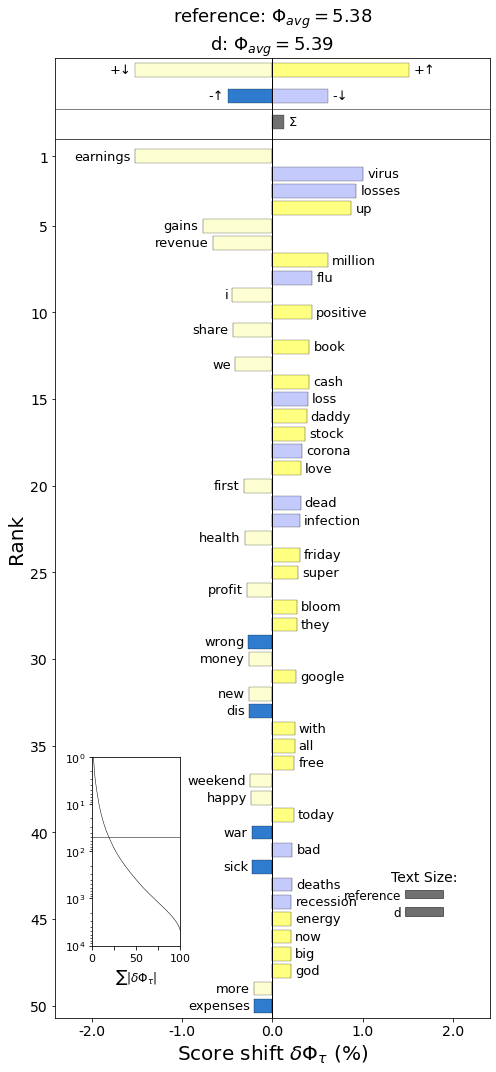

<AxesSubplot:title={'center':'reference: $\\Phi_{avg}=$5.38\nd: $\\Phi_{avg}=$5.39'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [24]:
import shifterator as sh
sentiment_sh = sh.WeightedAvgShift(type2freq_1 = p_ref, type2freq_2 = p, type2score_1 = labMT_dict, reference_value = 5)
sentiment_sh.get_shift_graph(detailed = True, system_names = ["reference", "d"])

Likewise, we see a lot of negative words such as "bad", "recession", and "losses" are more frequent during this day than the previous days. Words like "earnings", "profit" and "happy" are less frequent. Some words that are classified as positive might be used in a negative setting such as "the number of corona patients are 'up'", "a 'million' cases", and "tested 'positive' for corona". This also works the other way around of course.

However, our average metric shows that this day is a little bit more happy than the reference days. This can also be due to the "misclassification" of some of the words in different contexts. It does, however, support the Pollyanna hypothesis that we as humans tend to use more positive words even when in times of trouble since the average is above the neutral 5.

The general trend is that people were embracing the fact that the US had now declared a medical emergency due to Covid-19 and preparing themselves.

> How do words that you printed in step 6 relate to those shown by the WordShift?

By comparing the words printed earlier in step 6 with the rank ten words shown by the WordShift, it becomes clear that there is a clear correspondence between the results of the two approaches, given that the same order and words appear.

### Part 3: Communities for the Zachary Karate Club Network

In [22]:
#set font
import numpy as np
import matplotlib as mpl
import networkx.algorithms.community as nx_comm
from netwulf import visualize
%matplotlib inline
import networkx as nx
import netwulf as nw
import matplotlib.pyplot as plt
from community import community_louvain
def setup_mpl():
    mpl.rcParams['font.family'] = 'Times New Roman'
    return
setup_mpl()

>Visualize the graph using netwulf. Set the color of each node based on the club split (the information is stored as a node attribute).

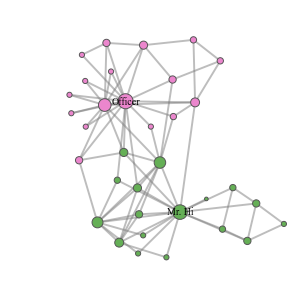

In [26]:
#1

#Create graph and get node attributes for nw:
G = nx.karate_club_graph()
for k, v in G.nodes(data=True):
    v['group'] = v['club']; del v['club']

# Set node 'size' attributes
for n, data in G.nodes(data=True):
    data['size'] = G.degree[n]

with plt.style.context('ggplot'):
    network, config = nw.interactive.visualize(G, plot_in_cell_below=False)
    fig, ax = nw.draw_netwulf(network)
    nw.add_node_label(ax,network, list(G.nodes())[0], label= G.nodes[list(G.nodes())[0]]['group'])
    nw.add_node_label(ax,network, list(G.nodes())[33], label= G.nodes[list(G.nodes())[33]]['group'])


>Write a function to compute the modularity of a graph partitioning (use equation 9.12 in the book). The function should take a networkX Graph and a partitioning as inputs and return the modularity.

In [18]:
#2
#Reload graph in order to keep club split called 'club'
G = nx.karate_club_graph()

#modularity function
def modularity(G: G, partitioning: list) -> float:
    L = len(G.edges())
    M = 0
    for partion in partitioning:
        subgraph = G.subgraph(partion).copy()
        L_c = subgraph.number_of_edges()
        K_c = sum(G.degree[node] for node in subgraph.nodes())
        M += (L_c/L) - (K_c/(2*L))**2
    return M

>Explain in your own words the concept of modularity.

Modularity Q is mathematically defined as follows:
$$a_{i}=\sum_{j} e_{ij}$$
$$Q = \sum_{i} e_{ii} - a_{i}^2$$

a is essentially the fraction of edges that connects to vertices within the community and Q is the trace minus a. The underlying idea is to say that the trace should be $e_{ij} = a_{i}a_{j}$ if the communities were random. Hence, we say the trace minus what the trace would be if it was a random network. Thus, high modularity means that the network has fewer than expected edges between partitions, which entails that the network might have strong partitions and thereby contain true communities. Thus, modularity is a measure of how well a partition divides truly divides the network into communities. Hence, high modularity for a given partition indicates that the corresponding community structure is appropriate to the true nature of the network structure.

>Compute the modularity of the Karate club split partitioning using the function you just wrote.

In [28]:
#4
#Making optimal partition based on club splits
hi = {key for (key, value) in dict(nx.get_node_attributes(G, "club")).items() if value == 'Mr. Hi'}
officer = {key for (key, value) in dict(nx.get_node_attributes(G, "club")).items() if value == 'Officer'}

print('Modularity: ',modularity(G, [hi, officer]))
print('\nModularity with nx: ',nx_comm.modularity(G, [hi, officer]))

Modularity:  0.3582347140039447

Modularity with nx:  0.3582347140039448


The modularity of the Karate club partition is approximately 0.36.

>We will now perform a small randomization experiment to assess if the modularity you just computed is statitically different from 0. To do so, we will implement the double edge swap algorithm.

In [19]:
#5
#Define double edge swapping function
import random
def double_edge_swap(G: G, N: int)->G:
    '''
    First we choose random nodes. After that we choose to search edges through the neighbors as we assume
    that the number of neighbors is much smaller than the entire edge list, especially for large
    scale networks. This is the way!
    '''
    G_random = G.copy()
    num_swaps = 0
    edges = list(G_random.edges) #Define edges out of the loop. No need to update them!
    while num_swaps < N:
        (u,_), (x,_) = random.choices(edges, k=2) #Draw source nodes
        
        if u==x: #Same source 
            continue
        
        u_neighbors = list(G_random.neighbors(u))
        x_neighbors = list(G_random.neighbors(x))
        
        v = random.choices(u_neighbors)[0] #Draw target nodes
        y = random.choices(x_neighbors)[0]
        
        if v==y: #Same target
            continue

        if (x not in G_random.neighbors(u)) and (y not in G_random.neighbors(v)):
            G_random.add_edge(u, x) 
            G_random.add_edge(v, y)
            G_random.remove_edge(u, v) 
            G_random.remove_edge(x, y)
            num_swaps += 1
    return G_random 

In [40]:
#Optional!!! - Configuration model :)
def conf_model(G: G)->G:
    G_conf = G.copy()
    edges = list(G_conf.edges)
    source_nodes = [x[0] for x in edges]
    target_nodes = [x[1] for x in edges]
    
    #Concatenate stubs
    stubs = source_nodes + target_nodes
    
    #Shuffle stubs
    random.shuffle(stubs)
    
    #Get new edges
    new_edges = list(zip(stubs[0::2], stubs[1::2]))
    
    #Create a multigraph in order to accomodate multiple links
    G_conf = nx.MultiGraph()
    
    #Add edges
    G_conf.add_edges_from(new_edges)
    return G_conf

G_conf = conf_model(G)
print('Degree of configurated graph: ',sum(dict(G_conf.degree()).values()))

print('\nDegree of real graph: ',sum(dict(G.degree()).values()))

Degree of configurated graph:  156

Degree of real graph:  156


>Double check that your algorithm works well, by showing that the degree of nodes in the original network and the new 'randomized' version of the network are the same.

In [39]:
#6
G_des = double_edge_swap(G, 100)
print('Degree of double edge swapped graph: ',sum(dict(G_des.degree()).values()))

print('\nDegree of real graph: ',sum(dict(G.degree()).values()))

Degree of double edge swapped graph:  156

Degree of real graph:  156


The preservation of the node degrees is due to the fact that we meerely swap edges, which entails that when we remove an edge we also add an edge. Thereby, gaurenteeing preservation of the node degree.

>Create 1000 randomized version of the Karate Club network using the double edge swap algorithm you wrote in step 5. For each of them, compute the modularity of the "club" split and store it in a list.

In [49]:
#7
#We had chosen to also implement the configuration model before the announcement on slack.
#We will demonstrate our double edge swap algorithm later
conf_mods = []
for _ in tqdm(range(1000)):
    G_conf = conf_model(G)
    conf_mods.append(modularity(G_conf, [hi, officer]))

100%|██████████| 1000/1000 [00:01<00:00, 829.75it/s]


>Compute the average and standard deviation of the modularity for the random network.

In [50]:
#8
print(f'The average modularity: {np.mean(conf_mods)}\nThe std: {np.std(conf_mods)}')

The average modularity: -0.005047337278106573
The std: 0.05851423625784517


>Plot the distribution of the "random" modularity. Plot the actual modularity of the club split as a vertical line (use axvline).

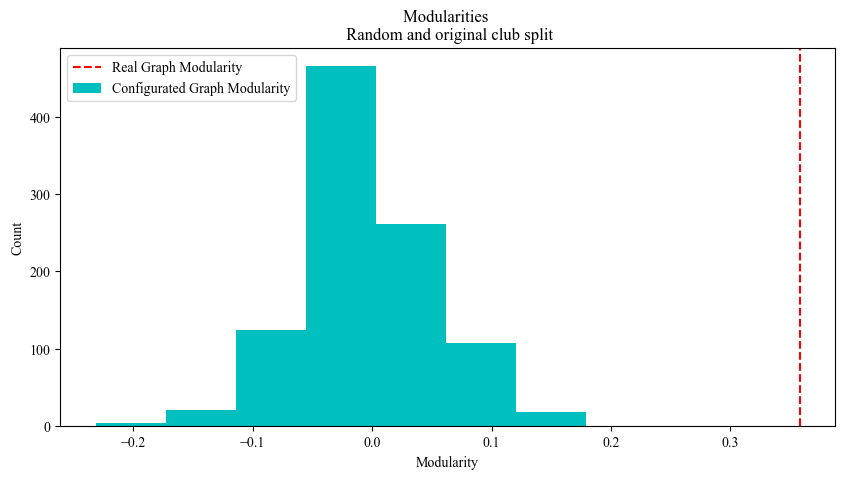

In [52]:
#9
actual_modularity=modularity(G, [hi, officer])
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
ax.hist(conf_mods, label="Configurated Graph Modularity", bins=7, color='c')
ax.axvline(actual_modularity, linestyle='--', color='r', label="Real Graph Modularity")
ax.set_title("Modularities \n Random and original club split")
ax.set_xlabel("Modularity")
ax.set_ylabel("Count")
ax.legend()
plt.show()

>Comment on the figure. Is the club split a good partitioning? Why do you think I asked you to perform a randomization experiment? What is the reason why we preserved the nodes degree?

By inspecting the above visualization it appears justifiable to argue that the club split is a decent partition, due to the actual modularity (red vertical line) being on the far right of the x-axis and not within the interval of 'random' modularities. However, to ensure that the difference is significantly different, we will determine the 95th percentile of the random modularities and see if the actual modularity is greater:


In [55]:
print(f"95th percentile of random modularities: {np.percentile(conf_mods, 95)}")
print(f'\nActual modularity: {actual_modularity}')

95th percentile of random modularities: 0.07618343195266267

Actual modularity: 0.3582347140039447


The above test does in fact yield that the actual modularity is significantly different from the random modularities. Hence, the results yield that the club partition of the karate graph has a higher modularity, than the club partition with random graphs, which entails that the club partition of the karate graph has fewer edges between partitions than expected at random. Thus, the club partition of the karate graph does appear to encompass some of the true community structure of the graph. 

The importance of preserving the node degree emerges from the modularity formula:

$$ M = \sum_{c=1}^{n_c} \left[ \frac{L_c}{L} - \left( \frac{k_c}{2L}^2 \right) \right] $$

Here $k_c$ describes the total degree of the nodes in community c. Hence, it is apparent that the modularity is dependent on the number of links in the network and these links should thus be kept constant. By keeping the node degrees constant it is ensured that the statistical comparison is done on graphs with the same node degree distribution, and therefore we are ensured that the possible change in modularity can be explained by the change of network structure and not due to a different number of links.

The comparison is done from the viewpoint of the random hypothesis, namely that *Randomly wired networks lack an inherent community structure*. This assumption allows for testing that can show significant differences, resulting in the existence of communities.

>Use the Python Louvain-algorithm implementation to find communities in this graph. Report the value of modularity found by the algorithm. Is it higher or lower than what you found above for the club split? What does this comparison reveal?

In [56]:
#11
partition = community_louvain.best_partition(G)
partition_dict = {item: set() for (key, item) in partition.items()}
for (key, item) in partition.items():
    partition_dict[item].add(key)
print('True split: ',modularity(G, [hi, officer]))
print('\nLouvain split: ', modularity(G, list(partition_dict.values())))

True split:  0.3582347140039447

Louvain split:  0.41978961209730437


The modularity is higher for the communities found by the Louvain algorithm, which indicates that there may be four communities rather than two. This suggests that there are in fact subcommunities within the two karate clubs, which could be believable. The dataset is made on who the individuals interact with outside the karate club, and it could very well be the case that people have joined the karate clubs from different sub-communities, which is something we as well can recognize, I am more likely to join the same karate club as my friend is a member in. One important limitation to keep in mind is that the Louvain algorithm has to allocate one node in one single community, thus not allowing for overlapping communities.

>Compare the communities found by the Louvain algorithm with the club split partitioning by creating a matrix D with dimension (2 times A), where A is the number of communities found by Louvain.

Confusion matrix: 
 [[11.  1.  0.  5.]
 [ 0. 11.  6.  0.]]


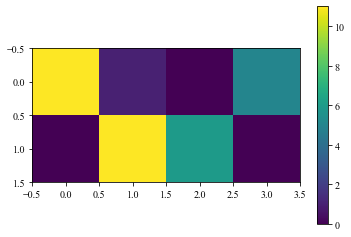

In [57]:
#12
D = np.zeros((2, len(partition_dict.keys())))
for i in range(D.shape[0]):
    for j in range(D.shape[1]):
        D[i, j] = sum([1 for x in partition_dict[j] if x in [hi, officer][i]])
print('Confusion matrix: \n',D)

#extra, because Felix just learned this command:
plt.imshow(D)
plt.colorbar()
plt.show()

The confusion matrix shows us that the two partitions (Officer and Mr Hi) are spread into four partitions by the Louvain algorithm. Mr Hi has been split into three different partitions while Officer seems to fit with two. Except for one person (D[0,1]), the two splits seem to agree with each other concerning separating Officer and Mr Hi. Hence the detected communities by the Louvain algorithm are in alignment with the true club split, except for the fact that the algorithm detects more communities.

## Community detection - GME network

>Use the Python Louvain-algorithm implementation to find communities. How many communities do you find? What are their sizes? Report the value of modularity found by the algorithm. Is the modularity significantly different than 0?

The following section will attempt to elucidate the underlying structure of the GME network, by seeing if it possible to detect any communities. To detect communities the Louvain-algorithm will be used. Consequently, the following analysis will be carried out using the reciprocal graph because the louvain algorithm assumes undirectedness.

In [13]:

#Using the reciprocal graph because louvain assumes undirectedness
GME_graph = nx.read_gexf(f"Week_8{os.sep}reciprocal_reddit_community_GME.gexf")
communities = community_louvain.best_partition(GME_graph)
print(f'The amount of communities: {max(list(communities.values())) + 1}')

The amount of communities: 551


The number of communities detected by the louvain algorithm is 551 distinct communities. The following histogram illustrate the size distribution of the detected communities:

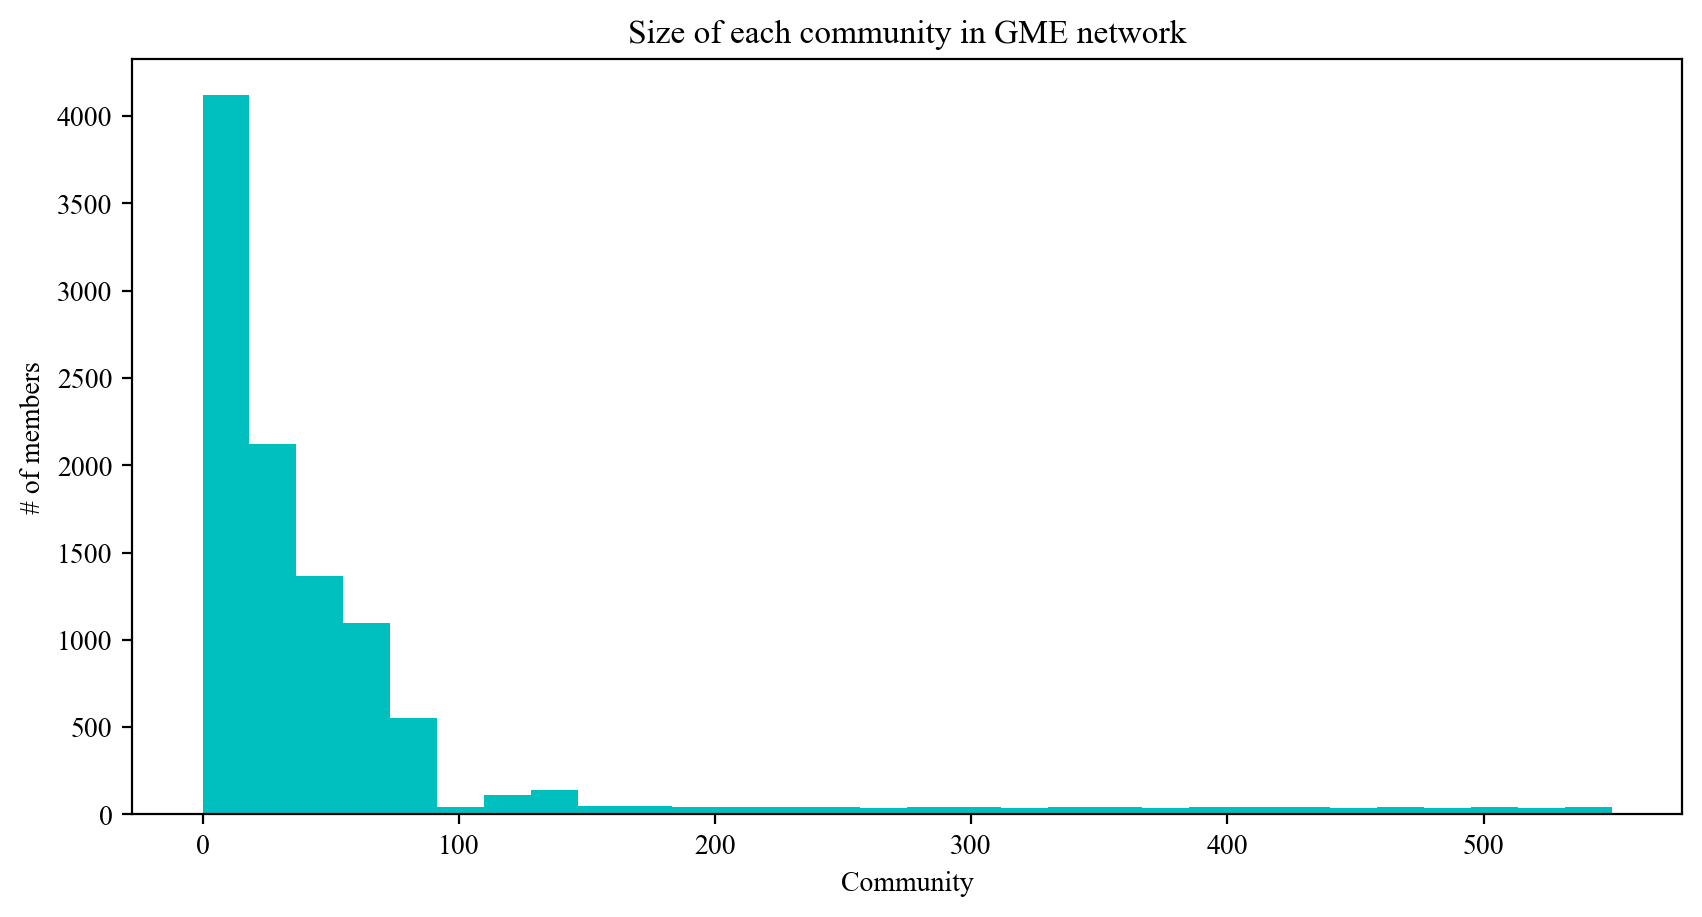

In [14]:
nx.set_node_attributes(GME_graph, communities, "louvain_community")
fig, ax = plt.subplots(figsize=(10,5), dpi=200)
ax.hist(communities.values(), bins=30, color='c')
ax.set_ylabel("# of members")
ax.set_xlabel("Community")
ax.set_title("Size of each community in GME network")
plt.show()

Given that the distribution have a heavy tail, the histogram is instead visualized with a logarithmic binning and scale:

In [15]:
min(communities.values()), max(communities.values())

(0, 550)

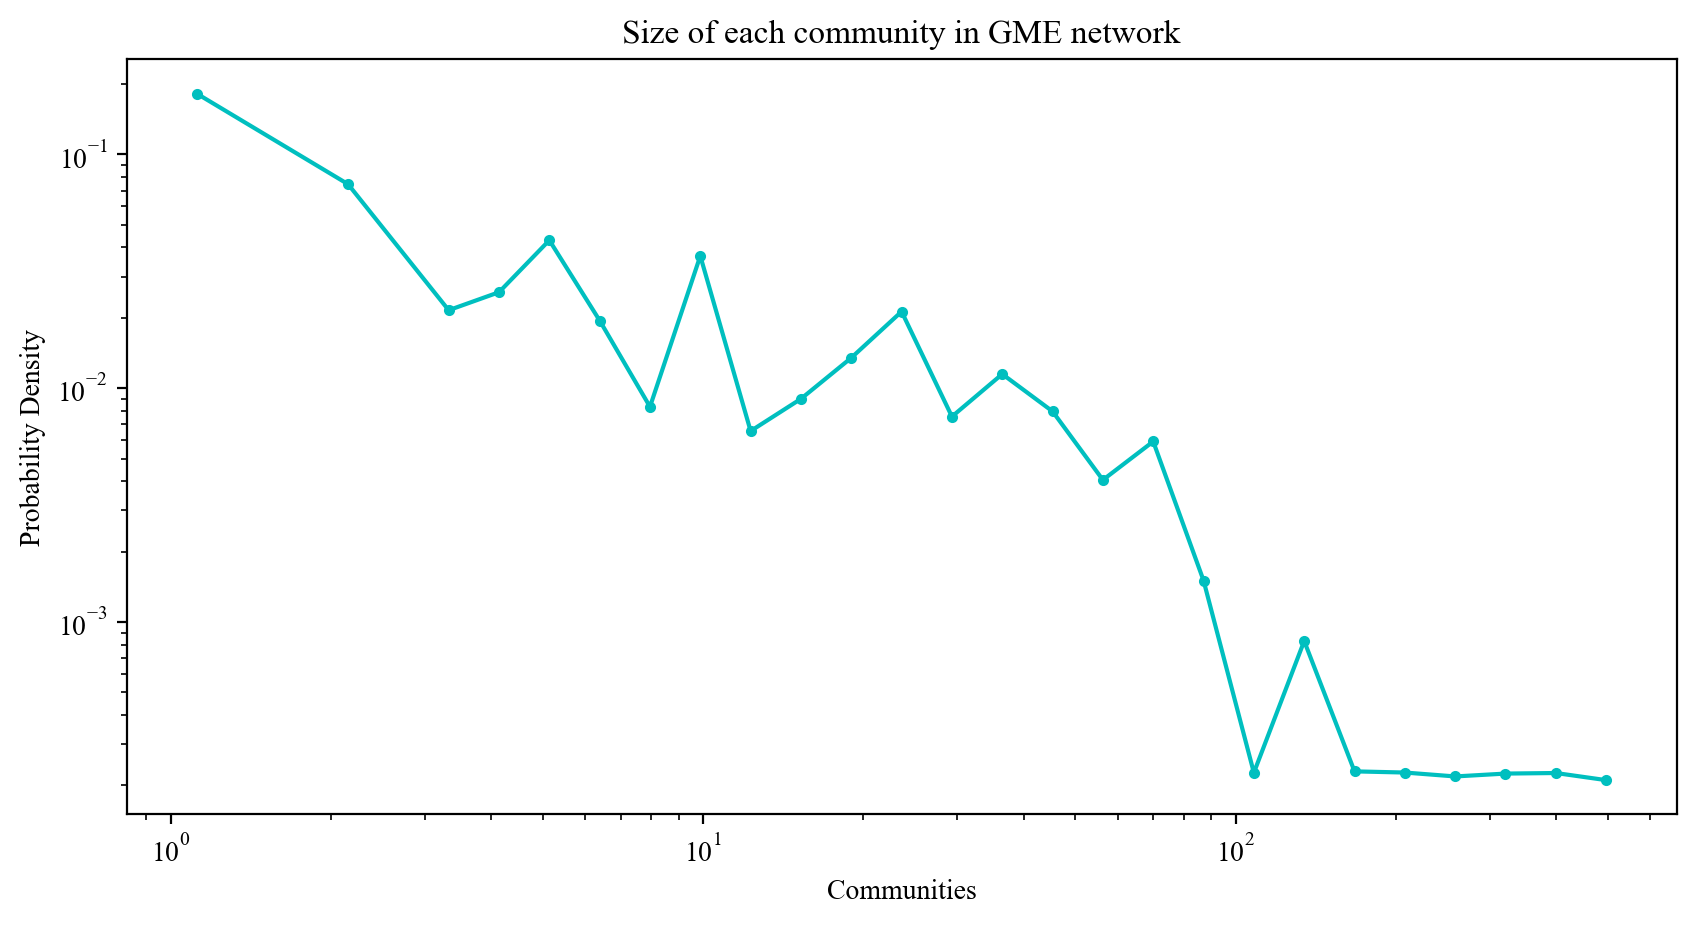

In [16]:
bins = np.logspace(0, np.log10(550), 30)
hist, edges = np.histogram(list(communities.values()), bins=bins, density=True)
x = (edges[1:]+edges[:-1])/2

fig, ax = plt.subplots(figsize=(10,5), dpi=200)
xx, yy = zip(*[(i,j) for (i,j) in zip(x, hist) if j > 0])
ax.plot(xx, yy, marker='.', color='c')
ax.set_ylabel("Probability Density")
ax.set_xlabel("Communities")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title('Size of each community in GME network')
plt.show()

The size of the communities is relatively heavy tailed, not quite as heavy tailed as expected for a power law distribution. However, the overall tendency of the community sizes is still that relatively few communities (<100) are large and the majority of the communities are small. 

Subsequently, the modularity is calculated:

In [20]:
community_dict = {item: set() for (key, item) in communities.items()}
for (key, item) in communities.items():
    community_dict[item].add(key)
print('Modularity of the GME network: ',modularity(GME_graph, list(community_dict.values())))

Modularity of the GME network:  0.6108549156382542


The value of the modularity for the partition found by the Louvain algorithm is approximately 0.61, which merely by inspection seems reasonable to assume is significant from zero. However, to ensure that the value is in fact significant, the following section will as previously compare the actually computed modularity with a "randomly" computed modularity. Hence, we compare the actual modularity with random modularities obtained by using the double-edge-swap algorithm to generate random graphs with the same degree.

In [21]:
random_mods = []
for _ in tqdm(range(1000)):
    G_random = double_edge_swap(GME_graph, GME_graph.number_of_edges()*2)
    random_mods.append(modularity(G_random, list(community_dict.values())))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [14:01<00:00,  1.19it/s]


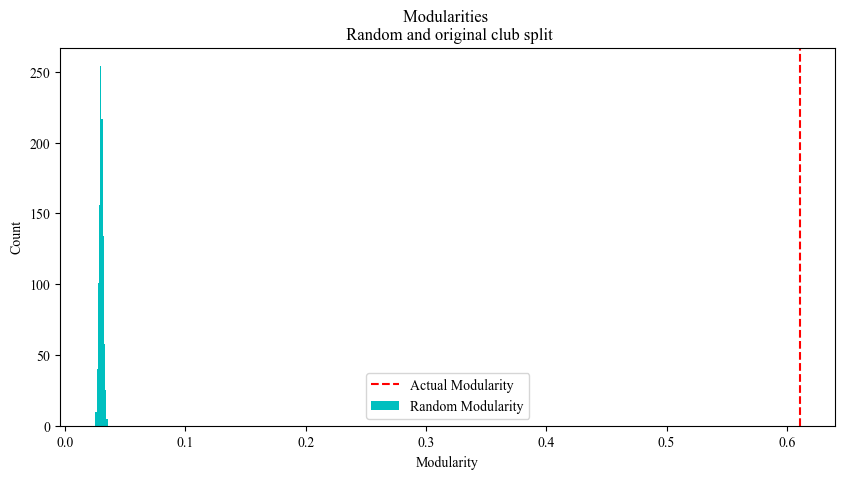

In [23]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
ax.hist(random_mods, label="Random Modularity", bins=10, color='c')
ax.axvline(modularity(GME_graph, list(community_dict.values())), linestyle='--', color='r', label="Actual Modularity")
ax.set_title("Modularities \n Random and original club split")
ax.set_xlabel("Modularity")
ax.set_ylabel("Count")
ax.legend()
plt.show()

To test if the difference is in fact significant, we determine the 95th percentile of the random modularities to see if the actual modularity is greater:

In [24]:
print(f"95th percentile of random modularities: {np.percentile(random_mods, 95)}")

print(f'\nActual modularity: {modularity(GME_graph, list(community_dict.values()))}')

95th percentile of random modularities: 0.03276591357691444

Actual modularity: 0.6108549156382542


The significance tests yield that the actual modularity is significantly different from the random modularities. Thus, the results yield that the actual modularity is also significantly different from zero.

The following section will initially visualize the detected communities in the GME network found by the Louvain-algorithm using the netwulf library.

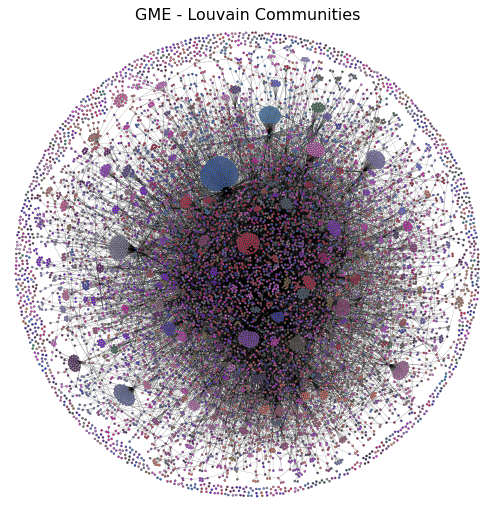

In [313]:
with plt.style.context('ggplot'):
    network, config = nw.visualize(nw.get_filtered_network(GME_graph, node_group_key='louvain_community'), plot_in_cell_below=False)
    fig, ax = nw.draw_netwulf(network)
    ax.set_title("GME - Louvain Communities")

The above visualization of the detected communities aligns with the previous findings that was related to the sizes of the communities. Namely, that the network constitutes of a few relatively large communities and a majority of small communities. 

As an additional extra exercise, the infomap community detection algorithm will be used to detect communities, and subsequently visualized with netwulf, as an attempt to investigate if the results of two algorithms differ in any manner.

In [25]:
#Extra:
from infomap import Infomap
GME_graph_temp = nx.convert_node_labels_to_integers(GME_graph).copy()
im = Infomap("--two-level")
for edge in GME_graph_temp.edges():
    im.addLink(*edge)
im.run()
print(f"Found {im.num_top_modules} modules with codelength: {im.codelength}")
print("Result")
print("\n#node module")
communities = {}
for node in im.tree:
    if node.is_leaf:
        #print(node.node_id, node.module_id)
        communities[node.node_id] = node.module_id
nx.set_node_attributes(GME_graph_temp, communities, 'info_community')

  Infomap v2.2.0 starts at 2022-04-05 21:13:17
  -> Input network: 
  -> No file output!
  -> Configuration: two-level
  OpenMP 201811 detected with 8 threads...
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'undirected'... Found 1336 modules with codelength: 7.685709917105884
Result

#node module

  -> Using undirected links.
  => Sum node flow: 1, sum link flow: 1
Build internal network with 10449 nodes and 16494 links...
Calculating one-level codelength... done!
 -> One-level codelength: 11.9663604
Calculating entropy rate... done!
  -> Entropy rate: 2.381776242

Trial 1/1 starting at 2022-04-05 21:13:17
Two-level compression: 36% 0.1% 0.00823303666% 0.00454448612% 
Partitioned to codelength 3.92248233 + 3.76322759 = 7.685709917 in 1336 modules.

=> Trial 1/1 finished in 0.763854s with codelength 7.68570992


Summary after 1 trial
Best end modular solution in 2 levels:
Per level number of modules:  

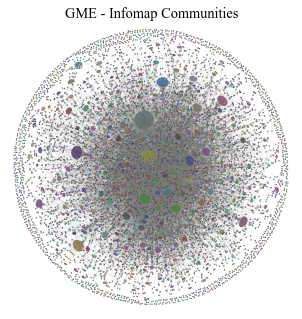

In [26]:
with plt.style.context('ggplot'):
    network, config = visualize(nw.get_filtered_network(GME_graph_temp, node_group_key='info_community'), plot_in_cell_below=False)
    fig, ax = nw.draw_netwulf(network)
    ax.set_title("GME - Infomap Communities")

The similarities between the detected communities of the Infomap algorithm and the Louvain-algorithm is quite evident. For instance, it appears that the two different algorithms detect the same large communities. 